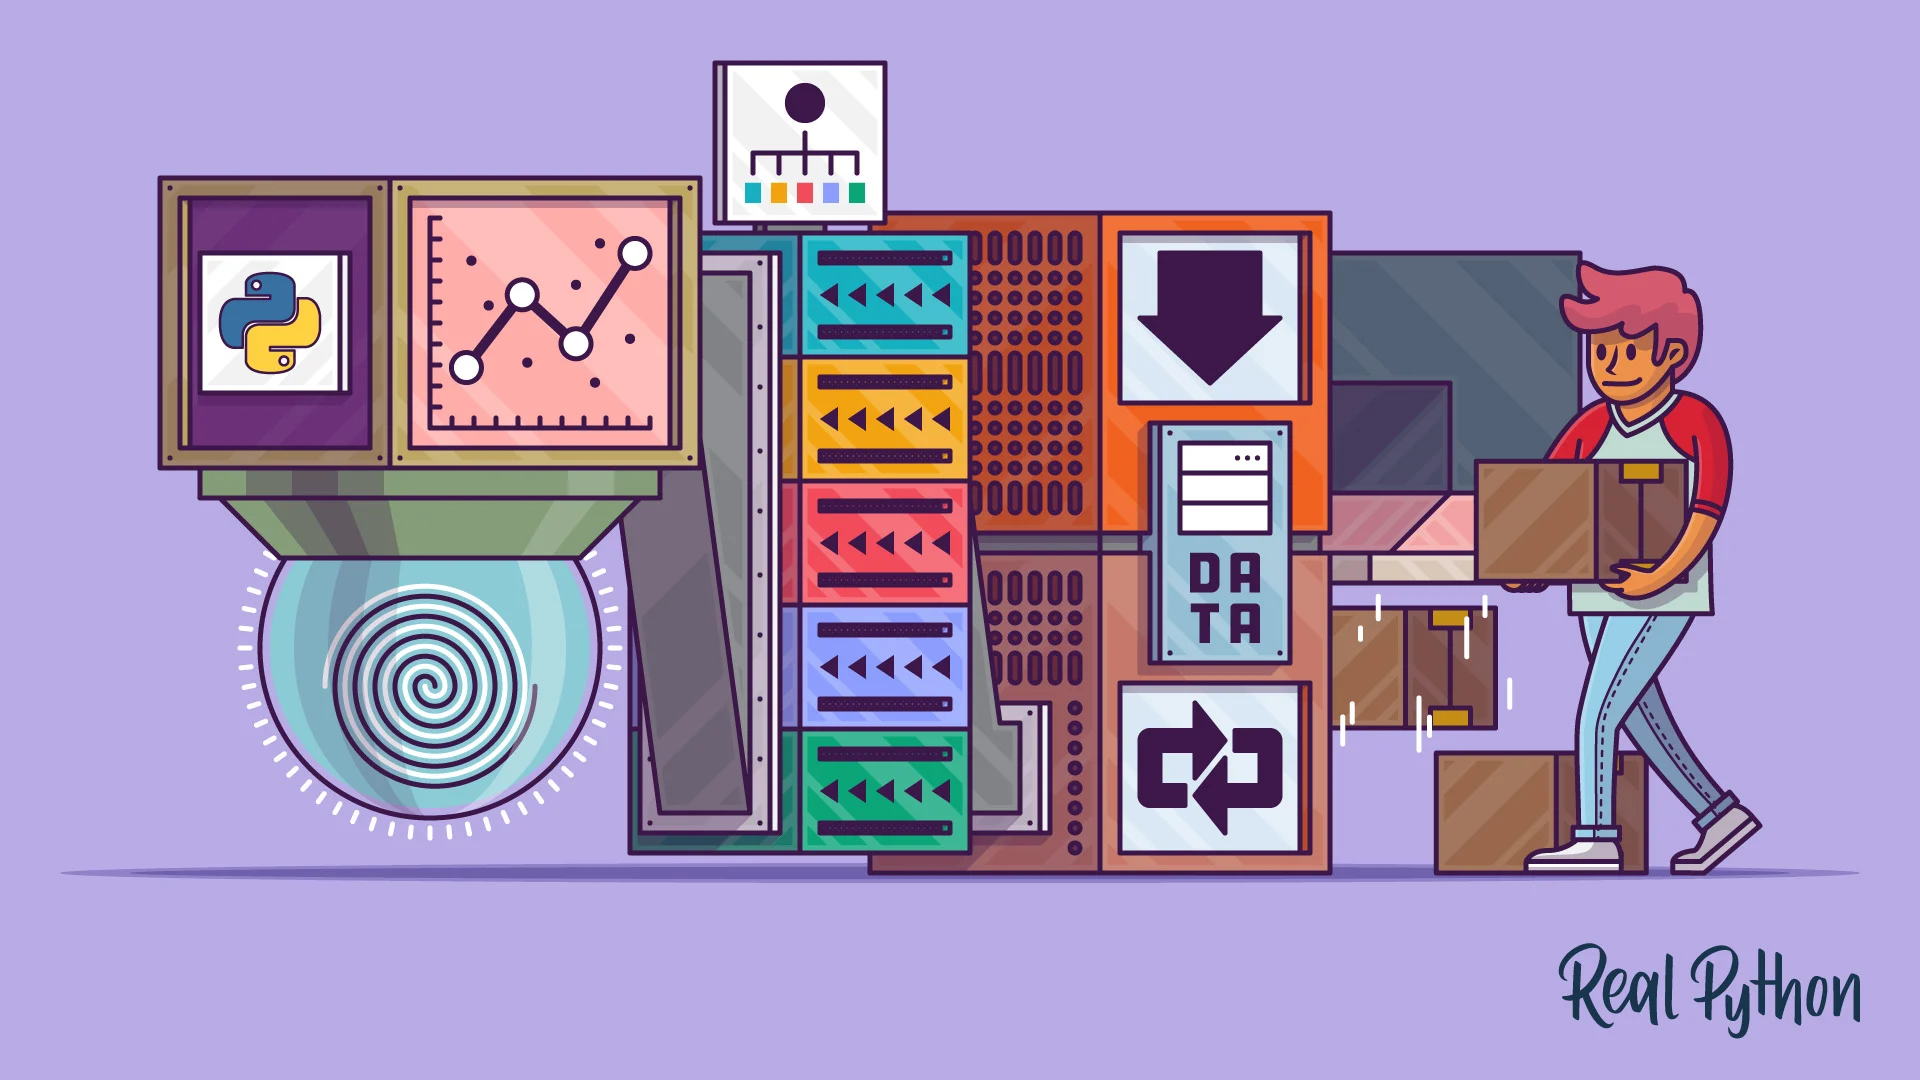

### 5. Model Development

To achieve our research objectives, we will develop two different classifier models: Logistic Regression model and Random Forest model.

Let's import the training and testing dataset from part 2

In [1]:
import pandas as pd 

In [7]:
final_train_data = pd.read_csv('final_train_data.csv')

In [24]:
X_train = pd.read_csv('X_train_data.csv')

In [25]:
y_train = pd.read_csv('y_train_data.csv')

In [9]:
X_test = pd.read_csv('X_test_data.csv')

In [10]:
y_test = pd.read_csv('y_test_data.csv')

In [26]:
train = final_train_data.copy()
xtrain = X_train.copy()
ytrain = y_train.copy()
xtest = X_test.copy()
ytest = y_test.copy()

In [13]:
train

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_nov,month_oct,...,contact_telephone,month_jun,housing_no,month_jul,day_of_week_tue,poutcome_failure,month_apr,poutcome_nonexistent,day_of_week_thu,deposit
0,0.018182,1.0,0.142857,0.479167,0.935308,0.054393,0.080027,0.000000,0,1,...,0,0,1,0,0,1,0,0,1,no
1,0.000000,1.0,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735,0,0,...,1,0,1,0,0,0,0,1,0,no
2,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.981864,1.000000,0,0,...,0,0,0,0,0,0,0,1,0,no
3,0.000000,1.0,0.000000,0.000000,0.174591,0.866109,0.018872,0.203781,1,0,...,0,0,1,0,1,0,0,1,0,yes
4,0.054545,1.0,0.000000,1.000000,0.484412,0.615063,0.982090,1.000000,0,0,...,0,0,0,0,1,0,0,1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53366,0.018182,1.0,0.000000,0.687500,0.389322,0.368201,0.780322,0.877883,1,0,...,0,0,0,0,0,0,0,1,1,no
53367,0.000000,1.0,0.000000,0.104167,0.000000,0.811715,0.055996,0.425709,0,0,...,0,0,0,0,0,0,0,1,0,yes
53368,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.980730,1.000000,0,0,...,0,0,0,1,0,0,0,1,0,no
53369,0.036364,1.0,0.000000,0.333333,0.269680,0.192469,0.143278,0.512287,0,0,...,0,0,0,0,0,0,0,1,1,no


### 5.1 Logistic regression model 

We can develop a logistic regression model, which is a supervised learning model that is commonly used to predict the probability of a binary event occurring.

####  Applying Regularization

As we have applied one-hot encoding to the original dataset, we now have a significant number of dummy variables in our training data, which could lead to overfitting when we train our classifier model. Overfitting occurs when a model is too complex and fits the training data too closely, resulting in poor predictove power on new data. To tackle this concern, we can apply regularization. 

Regularization is a technique used to avoid overfitting in machine learning models. It does this by adding a penalty term to the objective function (also called the loss function or error function) that the model is trying to minimize.

- In logistic regression, two common types of regularization are L1 regularization (Lasso) and L2 regularization (Ridge). L1 regularization adds the absolute values of the coefficients to the loss function, while L2 regularization adds the squared values. 
- The “C” hyperparameter controls the strength of the regularization.A smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model, while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.
- For our initial model, we will use L2 regularization, as it is less prone to overfitting than L1 regularization and is often used as a default choice. We will also set C = 0.01 as a default choice. 


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [22]:
# Create a logistic regression model
model = LogisticRegression(penalty= 'l2', C= 0.01) # penalty type = L2, and C = 0.01 

####  RFE (Recursive Feature Elimination)

After applying regularization, RFE (Recursive Feature Elimination), a widely used feature selection technique, will be used to develop our logistic regression model. 

RFE is an iterative algorithm that systematically removes less important predictors (features) from the dataset, ultimately improving model performance and reducing overfitting. It initiates with all available predictors and repeatedly fits the model, evaluates feature importance, and eliminates the least significant feature(s) until a specified number of features or a desired level of model performance is achieved.

In [23]:
from sklearn.feature_selection import RFE

Firstly, we apply RFECV (Recursive Feature Elimination with cross-validation) to determine the number of optimal features that will be needed in our logistic regression model.

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

In [32]:
min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)  # 5-fold Stratified Cross-Validation
model = LogisticRegression(penalty= 'l2', C= 0.01) # penalty type = L2, and C = 0.01 

We could develop the RFECV object to compute the cross-validated scores based on the "accuracy", meaning the proportion of correctly classified samples.The algorithm will then try to identify the optimal number of features that is required to achieve the optimal "accuracy" score. 

In [33]:
rfecv = RFECV(
    estimator=model,# our initial logistic regression model 
    step=1, # The number of features to remove at each iteration (step=1 means removing one feature at a time)
    cv=cv, # Cross-validation strategy (Stratified 5-fold in this case)
    scoring="accuracy", # The metric used for scoring features. In this case, it's accuracy
    min_features_to_select=min_features_to_select, # The minimum number of features to select. This is set to 1
    n_jobs=2, # Number of CPU cores to use for parallel processing (2 in this case)
)


In [41]:
import numpy as np

# converting y_train to a 1D array (or a flattened array) instead of a column-vector
y = np.ravel(ytrain)

In [42]:
rfecv.fit(xtrain, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=0.01), n_jobs=2, scoring='accuracy')

In [43]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 21


Hence, the optimal number of features of our model 21. We can also visualize how the mean test accuracy changes as the number of features selected varies during the RFECV process.

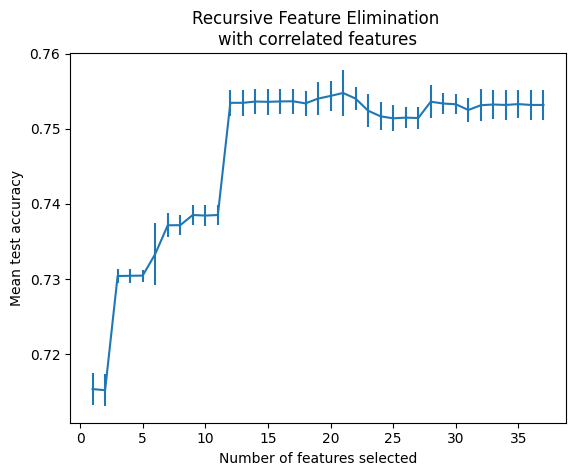

In [36]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

As shown in the plot, the mean test accuracy score hits its maximum at 21 features.

Now, we could use RFE to identify the most important predictors.

In [45]:
# Use the logistic regression model from RFECV
model_from_rfecv = rfecv.estimator_

# Use the optimal number of features selected by RFECV
optimal_num_features = rfecv.n_features_

# Initialize RFE with the model and the optimal number of features
rfe = RFE(estimator=model_from_rfecv, n_features_to_select=optimal_num_features)

# Fit RFE to the training data
rfe.fit(xtrain, y)

RFE(estimator=LogisticRegression(C=0.01), n_features_to_select=21)

Now, we can visualize the results from the RFE process, and see which features came out to be the most important ones.

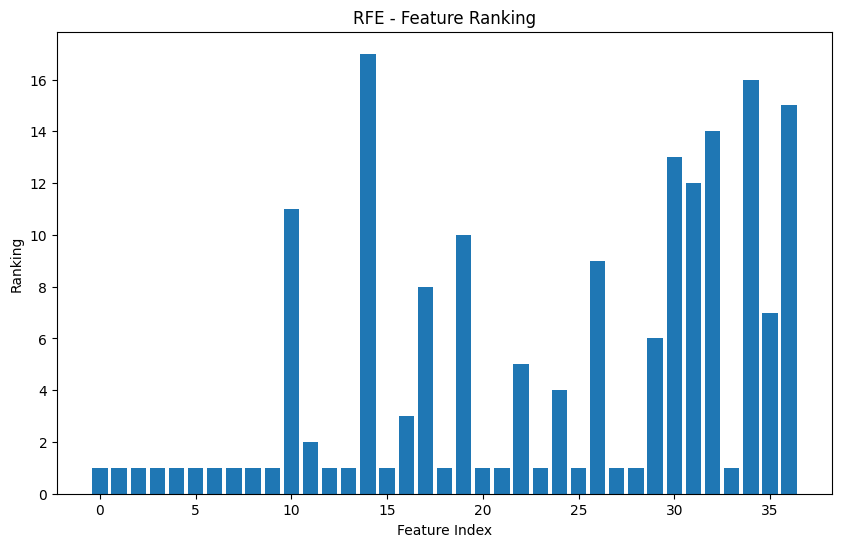

Selected Features: [ 0  1  2  3  4  5  6  7  8  9 12 13 15 18 20 21 23 25 27 28 33]


In [46]:
# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = np.where(feature_ranking == 1)[0]

# Visualize the feature ranking
plt.figure(figsize=(10, 6))
plt.title("RFE - Feature Ranking")
plt.xlabel("Feature Index")
plt.ylabel("Ranking")
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.show()

# Print the selected features
print("Selected Features:", selected_features)

The plot above suggests that the 0th, 1th, 2th, 3th, 4th, 5th, 6th, 7th, 8th, 9th, 12th, 13th, 15th, 18th, 20th, 21th, 23th, 25th, 27th, 28th, and the 33th features are the top 21 important features. Let's figure out what these features actually are.

In [47]:
# we call the features names from the training data
original_feature_names = xtrain.columns

# Get the names of the selected features
selected_feature_names = original_feature_names[selected_features]

# Print the names of the selected features
print("Selected Features:", selected_feature_names)

Selected Features: Index(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'month_nov', 'month_oct',
       'month_aug', 'contact_cellular', 'loan_yes', 'day_of_week_mon',
       'poutcome_success', 'month_mar', 'default_unknown', 'month_may',
       'default_no', 'contact_telephone', 'poutcome_failure'],
      dtype='object')


Hence, the predictors shown above are the top 21 important features. Let's now build our final logistic regression model using these features.

We can use the "statsmodel" library to develop a model and to further assess the p-value of each predictor. The p-value is a statistical measure that helps determine the significance of a predictor's contribution to the model. In the common practice, if a predictor has the p-value less than or equal to 0.05, it is considered statistically significant.

In [62]:
import statsmodels.api as sm
import pandas as pd 

# Calling the selected features from RFE process
selected_features = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'month_nov', 'month_oct',
                     'month_aug', 'contact_cellular', 'loan_yes', 'day_of_week_mon',
                     'poutcome_success', 'month_mar', 'default_unknown', 'month_may',
                     'default_no', 'contact_telephone', 'poutcome_failure']
X = xtrain[selected_features]

# Convert y to a Pandas Series
y_series = pd.Series(y)

# Map 'yes' to 1 and 'no' to 0
y_numeric = y_series.map({'yes': 1, 'no': 0})

# Create a logistic regression model
model1 = sm.Logit(y_numeric, X)

# Fit the model to the training data
result = model1.fit(maxiter=100)

# Print the summary
print(result.summary2())


         Current function value: 0.511115
         Iterations: 100
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.258     
Dependent Variable:     y                  AIC:                54599.4784
Date:                   2024-01-27 00:44   BIC:                54786.0639
No. Observations:       53371              Log-Likelihood:     -27279.   
Df Model:               20                 LL-Null:            -36739.   
Df Residuals:           53350              LLR p-value:        0.0000    
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         100.0000                                         
-------------------------------------------------------------------------
                   Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
-------------------------------------------------------------------------
campaign           -4.8839    0.3099 -15.7584 0.0000    -5.4914   -4.2765
p

/Users/iankim/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/iankim/anaconda3/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


We can see that the predictors such as 'nr.employed', 'month_oct', 'contact_cellular', 'default_unknown', 'default_no', 'contact_telephone' present p-value > 0.05. Hence, we remove these predictors.

In [63]:
# Assuming xtrain is your DataFrame with training features and y is your target variable
selected_features = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'month_nov',
                     'month_aug', 'loan_yes', 'day_of_week_mon',
                     'poutcome_success', 'month_mar', 'month_may',
                     'poutcome_failure']
X = xtrain[selected_features]

# Convert y to a Pandas Series
y_series = pd.Series(y)

# Map 'yes' to 1 and 'no' to 0
y_numeric = y_series.map({'yes': 1, 'no': 0})

# Create a logistic regression model
model2 = sm.Logit(y_numeric, X)

# Fit the model to the training data
result = model2.fit(maxiter=100)

# Print the summary
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.536739
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.220     
Dependent Variable: y                AIC:              57322.5636
Date:               2024-01-27 00:45 BIC:              57455.8389
No. Observations:   53371            Log-Likelihood:   -28646.   
Df Model:           14               LL-Null:          -36739.   
Df Residuals:       53356            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
campaign         -5.0402   0.3029 -16.6402 0.0000 -5.6338 -4.4465
pdays             0.4098   0.0428   9.5663 0.0000  0.3259  0.4938


/Users/iankim/anaconda3/lib/python3.10/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


Hence, every predictor has p-value < 0.05.

#### Examining Multicollinearity

Now that we have checked the statistical significance of the predictors, we can examine multicollinearty among them.
Multicollinearity refers to the presence of high correlations between predictor variables in a regression model. It can cause issues in the estimation of coefficients and lead to unstable and unreliable results.

Multicollinearity can ve examined vua VIF (Variance Inflation Factor). VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. VIF values greater than 10 are often considered indicative of multicollinearity.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming xtrain is your DataFrame with training features
selected_features = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'month_nov', 'month_aug', 'loan_yes',
                     'day_of_week_mon', 'poutcome_success', 'month_mar', 'month_may',
                     'poutcome_failure']

# Create a DataFrame with the selected features
X_selected = xtrain[selected_features]

# Add a constant column for intercept in VIF calculation
X_with_const = add_constant(X_selected)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Print the VIF data
print(vif_data)


            Variable         VIF
0              const  161.424767
1           campaign    1.057450
2              pdays   12.620900
3           previous    4.090839
4       emp.var.rate   60.152173
5     cons.price.idx    6.427718
6      cons.conf.idx    1.830658
7          euribor3m   41.805538
8          month_nov    1.320469
9          month_aug    2.488978
10          loan_yes    1.008648
11   day_of_week_mon    1.004124
12  poutcome_success   10.964641
13         month_mar    1.155771
14         month_may    1.357193
15  poutcome_failure    2.275565


As we have expected from the correlation matrix in the EDA, “emp.var.rate” and “euribor3m” seem to be highly correlated, as they present the highest VIF value of 60.15 and 41.8 respectively. "poutcome_success" also presented a VIF value of 10.96, which is above 10. 

Hence, we remove “emp.var.rate” and "poutcome_success".

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming xtrain is your DataFrame with training features
selected_features = ['campaign', 'pdays', 'previous', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'month_nov', 'month_aug', 'loan_yes',
                     'day_of_week_mon', 'month_mar', 'month_may',
                     'poutcome_failure']

# Create a DataFrame with the selected features
X_selected = xtrain[selected_features]

# Add a constant column for intercept in VIF calculation
X_with_const = add_constant(X_selected)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Print the VIF data
print(vif_data)

            Variable        VIF
0              const  49.149508
1           campaign   1.055595
2              pdays   3.378526
3           previous   4.080138
4     cons.price.idx   2.220479
5      cons.conf.idx   1.266878
6          euribor3m   2.699865
7          month_nov   1.248510
8          month_aug   1.566562
9           loan_yes   1.007801
10   day_of_week_mon   1.003668
11         month_mar   1.073273
12         month_may   1.223175
13  poutcome_failure   2.187745


Now every variable has VIF value less than 10, and hence we have solved the multicollinearity issue.

We can then develop our final logistic model using the finally selected predictors. The final model demonstrates the following coefficients for each predictor, and the intercept value.

In [120]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming xtrain is your DataFrame with training features and y is your target variable
selected_features = ['campaign', 'pdays', 'previous', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'month_nov',
                     'month_aug','loan_yes', 'day_of_week_mon',
                    'month_mar','month_may','poutcome_failure']
X = xtrain[selected_features]

# Convert y to a Pandas Series
y_series = pd.Series(y)

# Map 'yes' to 1 and 'no' to 0
y_numeric = y_series.map({'yes': 1, 'no': 0})

In [121]:
# Create a logistic regression model with L2 penalty and C=0.01
final_model = LogisticRegression(penalty='l2', C=0.01)

# Fit the model to the training data
final_model.fit(X, y_numeric)

# Access coefficients and intercept
coefficients = final_model.coef_
intercept = final_model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.68063511 -1.38235403 -0.40887308  0.39379622  0.7709061  -2.15197067
  -0.24727605 -0.14336489 -0.22656597 -0.1930244   0.71543798 -0.85754269
  -0.24893438]]
Intercept: [2.11076756]


In [122]:
xtest2 = xtest[selected_features] # altering the test data

In [123]:
# Print and compare feature names
print("Training Data Columns:", X.columns)
print("Test Data Columns:", xtest2.columns)

Training Data Columns: Index(['campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'month_nov', 'month_aug', 'loan_yes', 'day_of_week_mon',
       'month_mar', 'month_may', 'poutcome_failure'],
      dtype='object')
Test Data Columns: Index(['campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'month_nov', 'month_aug', 'loan_yes', 'day_of_week_mon',
       'month_mar', 'month_may', 'poutcome_failure'],
      dtype='object')


In [124]:
import numpy as np

# converting ytest to a 1D array (or a flattened array) instead of a column-vector
y2 = np.ravel(ytest)

# Convert y2 to a Pandas Series
y_series2 = pd.Series(y2)

# Map 'yes' to 1 and 'no' to 0
y_numeric2 = y_series2.map({'yes': 1, 'no': 0})

We can also assess the accuracy of the model.

In [126]:
log_accuracy = final_model.score(xtest2, y_numeric2)
print(f"Accuracy on the test set: {log_accuracy:.2f}")

Accuracy on the test set: 0.75


Hence, our final logistic regression model has the accuracy rate of 75%. 

### 5.2 Random Forest model 

We have so far developed a logistic regression model, which is a standalone algorithm for our classification task. We also saw that it's accuracy on the testing data was 75%, which implies that there could be a more optimal model than our logistic model . To develop a new model that could predict with higher accuracy, we could adopt ensemble learning.
Ensemble learning is a process where multiple ML models are generated and combined obtain better performance results and reduce the likelihood of selecting a poor model. Among the ensemble learning techniques, we could utilize Random Forest to improve our predictions.

Random Forest is an ensemble learning method that belongs to the family of decision tree-based models, and is commonly used for both classification and regression tasks. For a classification task, the primary idea behind a Random Forest is to build a collection (ensemble) of decision trees during training and output the majority vote of the individual trees during prediction. By combining multiple trees and introducing randomness in the feature selection and bootstrapping processes, a Random Forest can often generalize well to new, unseen data and is less prone to overfitting compared to individual decision trees.

In [65]:
from sklearn.ensemble import RandomForestClassifier

Firstly, we initiate a first random forest classifier with default settings from the sklearn library

In [67]:
# Initiate a first model 
rfmodel=RandomForestClassifier() # default settings from the sklearn library
rfmodel.fit(xtrain, y)

RandomForestClassifier()

In [68]:
preds = rfmodel.predict(xtest)

In [69]:
import numpy as np

# converting ytest to a 1D array (or a flattened array) instead of a column-vector
y2 = np.ravel(ytest)

We can then assess the accuracy rate of the initial model.

In [70]:
print (rfmodel.score(xtrain, y))
print(rfmodel.score(xtest,y2))

0.8981281969608964
0.8571535636663419


The model scores 89.8% accuracy on the training data and a lower 85.7% on the testing data. Since the discrepency between the two accuracy rate is relatively small, it’s safe to say the model is not prone to overfitting. However, we could still potentially improve the model.

We could also examine what features are considered the most important by the Random Forest when making the predictions.

In [72]:
pd.DataFrame(rfmodel.feature_importances_, index=xtrain.columns).sort_values(by=0, ascending=False)

,0
euribor3m,0.362330
campaign,0.107866
nr.employed,0.084344
emp.var.rate,0.064873
cons.conf.idx,0.041289
pdays,0.032543
cons.price.idx,0.029851
contact_telephone,0.024345
previous,0.022646
poutcome_success,0.016766


The model considers that social-economic factors, such as "euribor3m", "emp.var.rate", "cons.conf.idx", are the important features. 

#### Hyperparameter tuning for Random Forest

For our initial Random Forest model, the parameters such as the number of trees in the forest, the metric used to split the features, and others were set on the default values from sklearn. However, these default values are highly unlikely to be optimal for our specific task. 

One way to tune these parameters for our specific task is to perform a random grid search. We define a range of values for each hyperparameters in the grid, from which the random grid search alogorithm can randomly pick and choose until it finds a set that performs the best for our task. To begin we define values the search algorithm will search through. The range of values chosen for hyperparameters in this random grid are not simply arbitrary, but are chosen based on common practices and heuristics in machine learning.

In [127]:
# Number of trees in random forest
"""
Setting the values ranging from 100 to 3000 with a step of 200. This range provides a balance between having enough 
trees for the forest to generalize well,and avoiding excessive computational cost. 

"""
n_estimators = np.linspace(100, 2100, int((2000-100)/200) + 1, dtype=int)

# Number of features to consider at every split

max_features = ['auto', 'sqrt'] # Set 'auto' (all features) or 'sqrt' (square root of the total number of features)

# Maximum number of levels in tree
"""
Making sure to include various values for the maximum depth of individual decision trees in the random forest, as 
it is essential to control the depth to prevent overfitting. Smaller values help prevent overfitting, while larger 
values may lead to overfitting. 

"""
max_depth = [1, 5, 10, 20, 50, 75, 100, 150]

# Minimum number of samples required to split a node
"""
This represents different values for the minimum number of samples required to split an internal node. Smaller values 
can result in more splits and potentially overfitting, while larger values can lead to underfitting.

"""

min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Similar to min_samples_split, smaller values can lead to overfitting, and larger values can result in underfitting

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Criterion
criterion=['gini', 'entropy'] # commonly used stopping crieterion 
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

Hence, our random grid presents the options below for each hyperparameter.

In [81]:
random_grid

{'n_estimators': array([ 100,  322,  544,  766,  988, 1211, 1433, 1655, 1877, 2100]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

Next we can begin the search and then fit a new random forest classifier on the parameters found from the random search.

In [82]:
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(xtrain, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': array([ 100,  322,  544,  766,  988, 1211, 1433, 1655, 1877, 2100])},
                   random_state=42, verbose=2)

The optimal parameter values the random search found are as follows.

In [83]:
rf_random.best_params_

{'n_estimators': 1211,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 150,
 'criterion': 'entropy',
 'bootstrap': False}

We could also examine what features are considered the most important.

In [131]:
best_rf_model = rf_random.best_estimator_

# Access feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame(feature_importances, index=xtrain.columns, columns=['Importance'])
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                      Importance
euribor3m               0.355330
campaign                0.106133
nr.employed             0.094455
emp.var.rate            0.055894
pdays                   0.033536
cons.conf.idx           0.032824
cons.price.idx          0.029662
contact_cellular        0.024252
contact_telephone       0.023210
previous                0.020547
poutcome_success        0.019340
default_no              0.016300
default_unknown         0.014439
housing_no              0.014021
day_of_week_mon         0.013453
housing_yes             0.013407
day_of_week_fri         0.012866
day_of_week_thu         0.012515
day_of_week_tue         0.012461
day_of_week_wed         0.011023
loan_yes                0.010467
loan_no                 0.010399
poutcome_nonexistent    0.010236
month_may               0.008939
poutcome_failure        0.008140
month_oct               0.006432
housing_unknown         0.006407
loan_unknown            0.005156
month_mar               0.003530
month_apr 

Similar to the initial model, the model via random grid search considers that social-economic factors, such as "euribor3m", "emp.var.rate", "cons.conf.idx", are the important features. 

We can also evaluate its performance.

In [84]:
print (rf_random.score(xtrain, y))
print(rf_random.score(xtest, y2))

0.8882351839013697
0.858127857303455
[CV] END bootstrap=False, criterion=entropy, max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=150, min_samples_leaf=3, min_samples_split=15, n_estimators=766; total time= 1.1min
[CV] END bootstrap=False, criterion=entropy, max_depth=150, min_samples_leaf=3, min_samples_split=15, n_estimators=766; total time= 1.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=150, min_samples_leaf=3, min_samples_split=20, n_estimators=544; total time=  33.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=544; total time=  31.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, min_samples_leaf=4, min_samples_split=10, n_estimators=544; total time=  34.7s
[CV] END bootstrap=False, criterion=gini, max_depth=150, min_samples_leaf=4, min_samples_split=10, n_estimators=988; total time= 1.4min

The model scores 88.8% accuracy on the training data and a lower 85.8% on the testing data. Compared to the initial random forest model that scored 89.8% accuracy on the training data and a lower 85.7% on the testing data, there is not much difference between their performances. We can improve the model further by using grid search.

Using the parameter values obtained from the randomized grid search, we can initiate a more focused grid search. While the randomized search explores a subset of the parameter space with random values, the grid search systematically evaluates every possible combination of values. The randomized search serves as an efficient starting point, conserving computational resources before conducting a detailed exploration with the grid search.

In [128]:
rf_random.best_params_

{'n_estimators': 1211,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 150,
 'criterion': 'entropy',
 'bootstrap': False}

Based on the parameter values obtained from the randomized grid search, we can formulate a new grid on a smaller yet more focused parameter space for each hyperparmeters as follows.

In [107]:
param_grid = {
    'n_estimators': np.linspace(1200, 1250, 5, dtype = int),
    'max_depth': [140, 150, 160],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 3, 4, 5]
}

Subsequently, attempting to retrain another Random Forest through a GridSearch proved computationally demanding, despite simplifying the grid configuration. Unfortunately, the final model via Grid Search couldn't be developed due to computational limitations. However, the following codes illustrates the process for reference under the assumption of ample computational resources.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Base model
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = False)
# Instantiate the grid search model
rf_grid_final = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = 8, verbose = 2)
rf_grid_final.fit(xtrain, y)

In [ ]:
# to view what it found to be the most optimal set of parameters
best_rf_grid = rf_grid_final.best_estimator_
rf_grid_final.best_params_

In [ ]:
# to view the performance of the final model
print (grid_rf_search.score(training, training_labels))
print(grid_rf_search.score(testing, testing_labels))

Therefore, we finalize our Random Forest model based on the one obtained through the randomized grid search.

## 6. Model performance evaluation

This report aims to build a classification model for accurately identifying customers willing to make deposits, while also assessing the significance of demographic and socio-economic features in the model. The ultimate goal is to optimize the bank's telemarketing strategy. 
- To achieve this objective, relying solely on classifier accuracy is deemed inadequate. 
- Therefore, various model performance evaluation criteria have been employed, taking into account business considerations.

### 6.1 Recall as the Evaluation Criterion

In the business perspective, there were two types of major errors that the model could make, 
- Predicting a customer would make deposit but they actually do not (False Positive) which could lead to loss of resources
- Predicting a customer would not make deposit but they actually do (False Negative) which could lead to loss of potential profits. 

As the bank’s main objective is to maximize profits, the ideal classifier model should be able to minimize the loss of potential profits. Hence, we can consider that Recall (TP/(TP+FN)), an indicator of False Negative rate, could be an appropriate metric to evaluate the performance of our models.

#### Calculating Recall rate on the final logistic regression model

In [134]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming final_model.predict(xtest2) gives the predicted labels
y_pred = final_model.predict(xtest2)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_numeric2, y_pred)

# Extracting True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculating recall
recall = tp / (tp + fn)

# Printing the confusion matrix and recall
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_numeric2, y_pred))
print(f"\nRecall Rate: {recall:.2f}")

Confusion Matrix:
[[6273  985]
 [2362 3723]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      7258
           1       0.79      0.61      0.69      6085

    accuracy                           0.75     13343
   macro avg       0.76      0.74      0.74     13343
weighted avg       0.76      0.75      0.74     13343


Recall Rate: 0.61


Hence, the logistic regression model demonstrates the recall rate of 61%.

#### Calculating Recall rate on the final random forest model

In [135]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming final_model.predict(xtest2) gives the predicted labels
y_pred = rf_random.predict(xtest)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y2, y_pred)

# Extracting True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculating recall
recall = tp / (tp + fn)

# Printing the confusion matrix and recall
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y2, y_pred))
print(f"\nRecall Rate: {recall:.2f}")

Confusion Matrix:
[[6612  646]
 [1247 4838]]

Classification Report:
              precision    recall  f1-score   support

          no       0.84      0.91      0.87      7258
         yes       0.88      0.80      0.84      6085

    accuracy                           0.86     13343
   macro avg       0.86      0.85      0.86     13343
weighted avg       0.86      0.86      0.86     13343


Recall Rate: 0.80


Hence, the random forest model demonstrates the recall rate of 80%. 

### 6.2  ROC AUC as the Evaluation Criterion

ROC (Receiving Operating Characteristics) curve is commonly used as a performance measurement of a classifier model at various threshold settings. AUC (Area Under the Curve) of the ROC curve indicates how much the model is capable of distinguishing between classes. 
- The ROC plots also show the trade-offs between specificity and sensitivity (Recall) at every possible threshold. 
- The higher the ROC AUC is, the better the model is at correctly classifying overall. 
- The majority of studies on binary classifiers in conjunction with imbalanced datasets use the ROC plot as their main performance evaluation method due to the interpretational power that ROC plots hold.

#### ROC AUC of the final logistic regression model

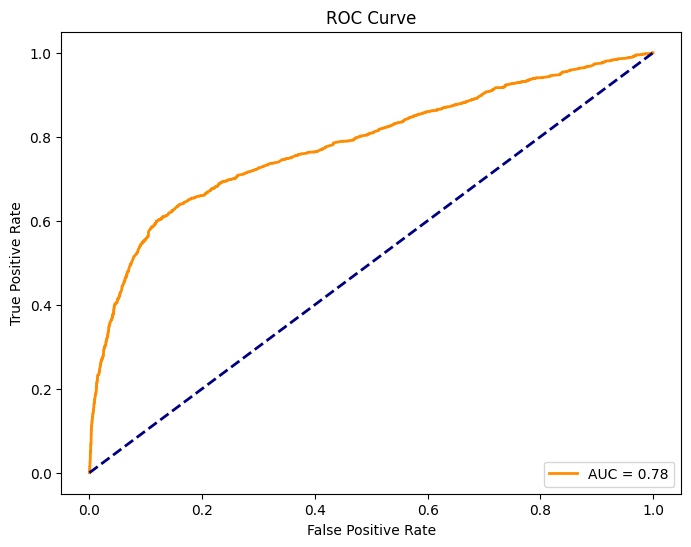


AUC: 0.78


In [136]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming final_model.predict_proba(xtest2) gives the predicted probabilities
y_prob = final_model.predict_proba(xtest2)[:, 1]

# Creating an ROC curve
fpr, tpr, thresholds = roc_curve(y_numeric2, y_prob)

# Calculating AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Printing AUC
print(f"\nAUC: {roc_auc:.2f}")

Hence, the logistic regression model demonstrates the ROC AUC score of 0.78.

#### ROC AUC of the final random forest model

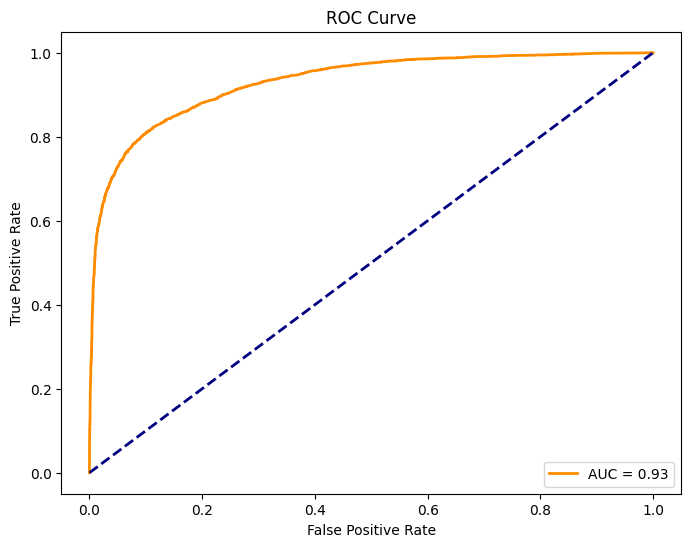


AUC: 0.93


In [138]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Assuming rf_random.predict(xtest) gives the predicted labels
y_pred = rf_random.predict(xtest)

# Convert categorical labels to binary (0 and 1)
lb = LabelBinarizer()
y2_binary = lb.fit_transform(y2)

# Assuming rf_random.predict_proba(xtest)[:, 1] gives the predicted probabilities for the positive class
y_prob = rf_random.predict_proba(xtest)[:, 1]

# Creating an ROC curve
fpr, tpr, thresholds = roc_curve(y2_binary, y_prob)

# Calculating AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Printing AUC
print(f"\nAUC: {roc_auc:.2f}")

Hence, the random forest model demonstrates the ROC AUC score of 0.93.

- The obtained results clearly highlight the substantial superiority of the random forest model over the logistic regression model in terms of accuracy, recall, and ROC AUC. 
- This outcome is unsurprising, given that the random forest model benefits from ensemble learning techniques, making it less susceptible to overfitting and increasing the likelihood of selecting optimal parameters for prediction.
- Consequently, we can confidently assert that the random forest model stands out as the optimal classifier to fulfill the objectives outlined in the report.

## 7. Conclusion

As concluded from the model performance evaluation, the random forest model emerges as the optimal classification model for this project. 
- The top 10 predictors identified by the random forest model are "euribor3m," "campaign," "nr.employed," "emp.var.rate," "pdays," "cons.conf.idx," "cons.price.idx," "contact_cellular," "contact_telephone," and "previous." 
- This indicates that the model highlights the significance of factors associated with current and previous marketing campaigns, as well as socio-economic variables, in predicting customer subscriptions to deposits.
- In essence, the model's interpretation underscores the importance of focusing on socio-economic factors during telemarketing efforts and leveraging historical telemarketing records to effectively target customers. 
- Consequently, commercial banks are recommended to prioritize these aspects in their telemarketing strategies, leading to potential improvements in overall effectiveness.

## 8. Possible improvements and limitations

### 8.1 Cost-Benfit matrix

An alternative strategy that had the potential to enhance the classifier models was the utilization of the Expected Value (EV) framework to construct a cost-benefit (CB) matrix tailored to the bank's business model. 
- This approach could have facilitated the determination of optimal threshold values for both logistic and random forest models in classification, thereby potentially improving their overall performance. 
- However, the limitation arose from a lack of expertise in the banking sector, preventing the assignment of meaningful cost and benefit values in the CB matrix. 
- Consequently, further research could have been conducted to develop a comprehensive CB matrix, aiming to refine and optimize the models.

### 8.2 Using synthetic data

The models we have developed may have encountered accuracy limitations attributed to the utilization of synthetically generated training data. 
- Although this approach was employed to address potential challenges associated with developing a model on highly imbalanced data, there remains a risk that the model may be distorted or biased due to the use of artificial data.
- Despite mitigating overfitting concerns with oversampling through synthetic data generation using SMOTE, an alternative approach could have involved using the original dataset while adopting other model performance evaluation criteria, such as Precision-Recall (PRC) plots or the concentrated ROC (CROC). These methods are widely recognized for assessing classifier models in the context of imbalanced data. 

## 9. Learning Resources

### Blogs

- Random Forest Regression - The Definitive guide | cnvrg.io. cnvrg. https://cnvrg.io/random-forest-regression/
- Guide for building an End-to-End Logistic Regression Model. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/
- Recursive feature elimination with cross-validation. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
- Recursive feature elimination: a powerful technique for feature selection in machine learning. Medium. https://medium.com/@evertongomede/recursive-feature-elimination-a-powerful-technique-for-feature-selection-in-machine-learning-89b3c2f3c26a
- Logistic Regression and regularization: Avoiding overfitting and improving generalization. Medium. https://medium.com/@rithpansanga/logistic-regression-and-regularization-avoiding-overfitting-and-improving-generalization-e9afdcddd09d
- Understand random forest algorithms with examples (Updated 2024). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=A.%20Random%20Forest%20is%20a,and%20outliers%20in%20the%20data.
- Guide to AUC ROC Curve in Machine Learning : What is specificity? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

### Projects

- Molina, E. (2022, March 3). A practical guide to implementing a random forest classifier in Python. Medium. https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263